In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# for notebook
# %matplotlib notebook    

# for VS code
%matplotlib inline   

Alcune variabili definite nel primo blocco vengono richiamate anche nei blocchi successivi

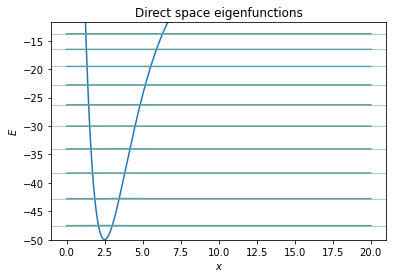

In [46]:
#Eigenvalues in x space 
data = np.loadtxt('../Output/eigenvalues.txt')
idxs = data[:,0]
n_s = 10                      # number of states to show (in both x and k space)
#n_s = len(idxs)                 # uncomment this to show all states
eva_x = data[:,1]
#
# Eigenfunctions in x_space 
data = np.loadtxt('../Output/pot.txt')
x = data[:,0]
V_x = data[:,1]

data = np.loadtxt('../Output/eigenvectors.txt')
waves = data[:,1:]
fig, ax = plt.subplots()
#
_ = ax.set_title('Direct space eigenfunctions')
_ = ax.set_xlabel(r'$x$')
_ = ax.set_ylabel(r'$E$')
y_inf = np.amin(V_x) - 0.02 ; y_sup = eva_x[n_s -1] + 2.0 
_ = ax.set_ylim(y_inf, y_sup)
_ = ax.plot(x, V_x)
ff = ( eva_x[1] - eva_x[0] ) * 0.3
for i in range(n_s):
    _ = ax.axhline(y = eva_x[i], lw=0.5, color='cadetblue')
    _ = ax.plot(x, eva_x[i] + ff*waves[:,i] , color= 'cadetblue')
plt.show()
#fig.savefig('waves_x.jpeg', dpi=300, bbox_inches='tight')

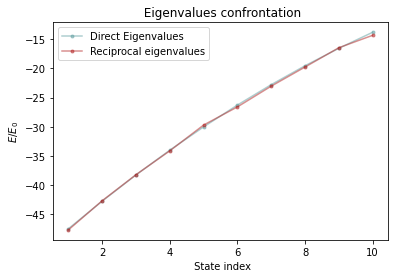

In [48]:
# Eigenvalues comparison 
plt.close('all')
fig, ax = plt.subplots()
plt.subplots_adjust(wspace=0.3)
data = np.loadtxt('../Output/eigenvalues_k.txt')
eva_k = data[:,1]
_ = ax.set_title(' Eigenvalues confrontation')
_ = ax.set_xlabel(' State index')
_ = ax.set_ylabel(r'$E/E_0$')
_ = ax.plot(idxs[:n_s], eva_x[:n_s], marker='.', color='cadetblue', label='Direct Eigenvalues', alpha=0.5)
_ = ax.plot(idxs[:n_s], eva_k[:n_s], marker='.', color='firebrick', label='Reciprocal eigenvalues', alpha=0.5)
_ = ax.legend()
plt.show()
fig.savefig('w_eva_confrontation.png')


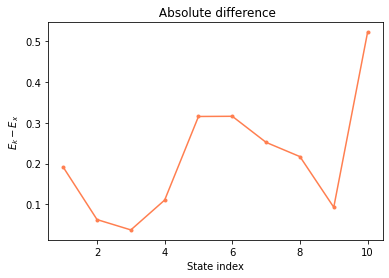

<Figure size 432x288 with 0 Axes>

In [58]:
fig, ax = plt.subplots()
data = np.loadtxt('../Output/eigenvalues_k.txt')
eva_k = data[:,1]

data = np.loadtxt('../Output/eigenvalues.txt')
idxs = data[:,0]

_ = ax.set_title(' Absolute difference')
_ = ax.set_ylabel(r'$E_k - E_x$')
_ = ax.set_xlabel('State index')
_ = ax.plot(idxs[:n_s], abs(eva_k[:n_s] - eva_x[:n_s] ) , marker='.', color='coral', label='Difference')
plt.show()
plt.savefig("abs_difference.png")

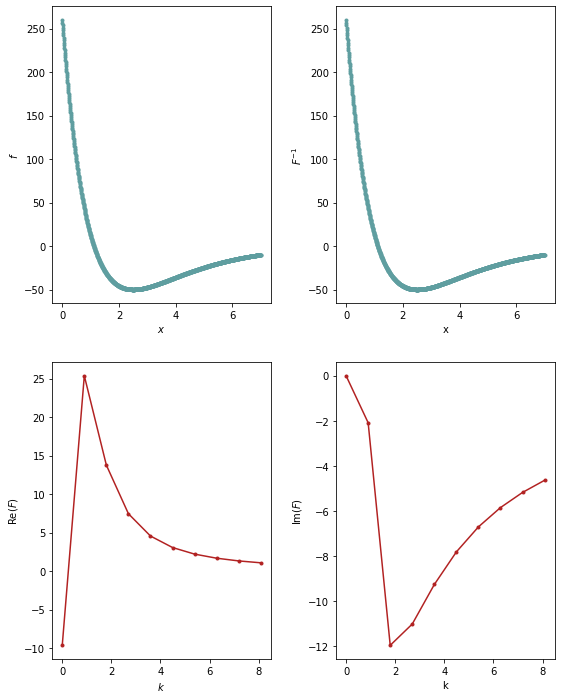

In [36]:
# Fourier transform comparison
plt.close('all')
fig, ax = plt.subplots(2,2, figsize=(9,12))
plt.subplots_adjust(wspace=0.3)
data = np.loadtxt('../Output/fourier.txt')
x = data[:,0]
re_f = data[:,1]
k = data[:,2]
re_F = data[:,3]
im_F = data[:,4]
re_at_f = data[:,5]

#
_ = ax[0,0].set_ylabel(r'$f$')
_ = ax[0,0].set_xlabel(r'$x$')
_ = ax[0,1].set_ylabel(r'$F^{-1}$')
_ = ax[0,1].set_xlabel(r'x')
_ = ax[0,0].plot(x, re_f, marker='.', color='cadetblue')
_ = ax[0,1].plot(x, re_at_f, marker='.', color='cadetblue')
#
_ = ax[1,0].set_ylabel(r'Re$(F)$')
_ = ax[1,0].set_xlabel(r'$k$')
_ = ax[1,1].set_ylabel(r'Im$(F)$')
_ = ax[1,1].set_xlabel(r'k')
_ = ax[1,0].plot(k[:n_s], re_F[:n_s], marker='.', color='firebrick')
_ = ax[1,1].plot(k[:n_s], im_F[:n_s], marker='.', color='firebrick')
#
plt.show()
#fig.savefig('w_four.png')

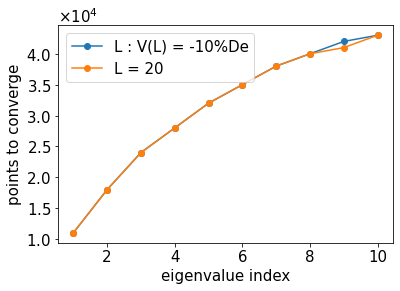

In [37]:
from matplotlib import pylab

fig, ax = plt.subplots()



data = np.loadtxt('../Output/eva_variation_L.txt')
x1 = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]

_ = ax.set_ylabel('points to converge')
_ = ax.set_xlabel('eigenvalue index')
_ = ax.plot(x1, y1, marker='o', label='L : V(L) = -10%De')
_ = ax.plot(x1, y2, marker='o', label='L = 20')

pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4),useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(15)


for item in ([ax.xaxis.label, ax.yaxis.label]+
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

ax.legend(loc=2,prop={ 'size': 15})

plt.savefig("x_index.jpeg", dpi=300)
plt.show()

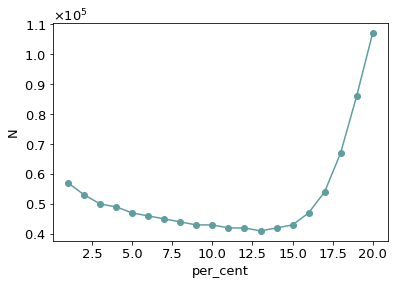

In [38]:
fig, ax = plt.subplots()

data = np.loadtxt('../Output/L_variation_perc.txt')
x3 = data[:, 0]  #percentage
y3 = data[:, 2]  #converging points

_ = ax.set_ylabel('N')
_ = ax.set_xlabel('per_cent')


pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4),useOffset=False, useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(13)


for item in ([ax.xaxis.label, ax.yaxis.label]+
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(13)

_ = ax.plot(x3, y3, marker='o', color='cadetblue')


plt.savefig("x_L.pdf")
plt.show()

In [39]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')


data = np.loadtxt('../Output/heat_map.txt')
x_g = np.linspace(1,20,20)
y_g = np.linspace(1,10,10)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

X,Y = np.meshgrid(x_g,y_g)

z = data[:,:]

ax.set_xlabel("percentage")
ax.set_ylabel("eigenvalue index")
ax.set_zlabel("converging points")


plot = ax.plot_surface(X=X, Y=Y, Z=z, rstride=1, cstride=1,
               cmap="inferno",linewidth=0, antialiased=False)



OSError: ../Output/heat_map.txt not found.

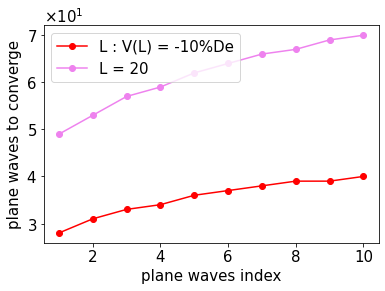

In [11]:
fig, ax = plt.subplots()

data = np.loadtxt('../Output/eva_variation_L_K.txt')
x1 = data[:, 0]
y1 = data[:, 1]
y2 = data[:, 2]


_ = ax.set_ylabel('plane waves to converge')
_ = ax.set_xlabel('plane waves index')


pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4),useOffset=False, useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(15)


for item in ([ax.xaxis.label, ax.yaxis.label]+
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

_ = ax.plot(x1, y1, marker='o', label='L : V(L) = -10%De', color='red')
_ = ax.plot(x1, y2, marker='o', label='L = 20', color= 'violet')

ax.legend(loc=2,prop={ 'size': 15})
plt.savefig("index_k.jpeg", dpi = 300)
plt.show()

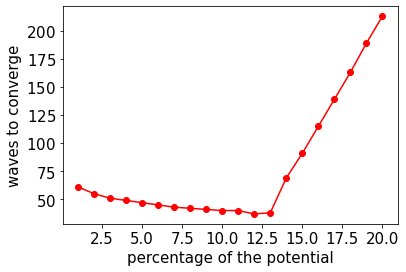

In [10]:
fig, ax = plt.subplots()

data = np.loadtxt('../Output/L_variation_perc_K.txt')


data = np.loadtxt('../Output/L_variation_perc_K.txt')
x3 = data[:, 0]  #percentage
y3 = data[:, 2]  #converging points

_ = ax.set_ylabel('waves to converge')
_ = ax.set_xlabel('percentage of the potential')


pylab.ticklabel_format(axis='y',style='sci',scilimits=(1,4),useOffset=False, useMathText=True)
ax.yaxis.get_offset_text().set_fontsize(15)


for item in ([ax.xaxis.label, ax.yaxis.label]+
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)

_ = ax.plot(x3, y3, marker='o', color='red')


plt.savefig("k_L.pdf")
plt.show()